In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("processed_data.csv", delimiter='\t')


In [4]:
df = df[['AD_ID','AD_CLICKS','AD_IMPRESSIONS','AD_SPEND','AD_TARGETING_AGE','AD_TARGETING_INTERESTS','AD_TEXT', 'AD_POTENTIAL_TARGET','positivity_index','negativity_index', 'neutrality_index','compound_measure', 'flag', 'CTR']]

In [5]:
# Deleting nan values from AD_TARGETTING_INTEREST column
df = df.dropna(subset=['AD_TARGETING_INTERESTS'])

In [6]:
df['LGBT'] = np.where(df['AD_TARGETING_INTERESTS'].str.contains('LGBT|Homosexuality'), 1, 0)
df['ISLAM'] = np.where(df['AD_TARGETING_INTERESTS'].str.contains('Muslim|Islam'), 1, 0)
df['BLACK'] = np.where(df['AD_TARGETING_INTERESTS'].str.contains('Black|African'), 1, 0)
df['POLICE'] = np.where(df['AD_TARGETING_INTERESTS'].str.contains('Amendement|Crime|Police|Gun|Cop'), 1, 0)
df['HISPANIC'] = np.where(df['AD_TARGETING_INTERESTS'].str.contains('Mexico|Mexican'), 1, 0)
df['CONSERVATIVE'] = np.where(df['AD_TARGETING_INTERESTS'].str.contains('Conservative|Conservatism'), 1, 0)

In [7]:
df.head()

,AD_ID,AD_CLICKS,AD_IMPRESSIONS,AD_SPEND,AD_TARGETING_AGE,AD_TARGETING_INTERESTS,AD_TEXT,AD_POTENTIAL_TARGET,positivity_index,negativity_index,neutrality_index,compound_measure,flag,CTR,LGBT,ISLAM,BLACK,POLICE,HISPANIC,CONSERVATIVE
0,1,6,358,0.0,18 - 51,"News broadcasting, Political party, Breaking n...",Instgogogo,52000000.0,0.000,0.000,1.000,0.0000,neutral,1.676,0,0,0,0,0,0
2,3,0,0,0.0,18 - 65+,Cop Block or Black (Color),Black lives matter because we see what's going...,17000000.0,0.259,0.000,0.741,0.9062,positive,0.000,0,0,1,1,0,0
3,4,33,14311,0.0,13 - 44,Cop Block,Don't Shoot is a community site where you can ...,490000.0,0.169,0.048,0.784,0.6247,positive,0.231,0,0,0,1,0,0
4,5,201,29786,0.0,18 - 65+,Understanding racial segregation in the united...,WHERE is your VOICE?,NaN,0.000,0.000,1.000,0.0000,neutral,0.675,0,0,1,1,0,0
5,6,0,0,0.0,13 - 44,"Christ's Commission Fellowship, Jesus, Jesus D...",Conservative Christians. Pro-life/ gun/ police...,21000000.0,0.000,0.000,1.000,0.0000,neutral,0.000,0,0,0,0,0,0


In [9]:
f=['TARGET_GROUP','CTR_mean', '%positive', '%negative', '%neutral','impressions']
metrics = pd.DataFrame(columns=f)

In [10]:
metrics


,TARGET_GROUP,CTR_mean,%positive,%negative,%neutral,impressions


In [11]:

Targets = ['LGBT','ISLAM','BLACK','POLICE','HISPANIC','CONSERVATIVE']



In [12]:
for t in Targets : 
    metrics= metrics.append({'TARGET_GROUP': t, 
                'CTR_mean': df[df[t]==1]['CTR'].mean(),
                '%positive':np.sum(df[df[t]==1]['flag']=='positive')/len(df[df[t]==1]), 
                '%negative':np.sum(df[df[t]==1]['flag']=='negative')/len(df[df[t]==1]), 
                '%neutral':np.sum(df[df[t]==1]['flag']=='neutral')/len(df[df[t]==1]),
                'impressions': df[df[t]==1]['AD_IMPRESSIONS'].sum()} ,ignore_index=True)


In [13]:
metrics

,TARGET_GROUP,CTR_mean,%positive,%negative,%neutral,impressions
0,LGBT,7.279596,0.230769,0.250000,0.519231,812174
1,ISLAM,2.962161,0.161290,0.064516,0.758065,539155
2,BLACK,8.541585,0.351048,0.248503,0.393713,17885543
3,POLICE,5.452895,0.308411,0.287383,0.404206,8253182
4,HISPANIC,12.483726,0.233503,0.050761,0.710660,4800676
5,CONSERVATIVE,6.055139,0.222222,0.055556,0.722222,191539


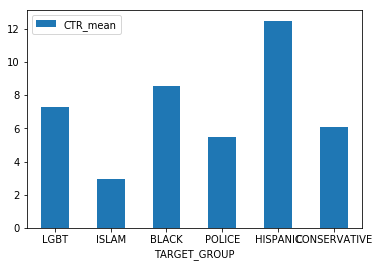

In [14]:
#plotting CTR_mean vs Target_groups
ax = metrics.plot.bar(x='TARGET_GROUP', y='CTR_mean', rot=0)
plt.show()

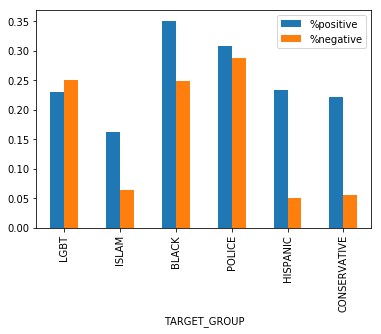

In [15]:
#plotting CTR_mean vs positive and negative
ax = metrics.plot.bar(x='TARGET_GROUP', y=['%positive','%negative'])
plt.show()

In [16]:
#calculate the mean CTR for all the ads:
df['CTR'].median()


6.153499999999999

In [17]:
#CTR above this value means effective and vice versa

In [18]:
metrics['effectiveness']= np.where(metrics['CTR_mean'] > df['CTR'].median(), 'Yes', 'No')

In [19]:
metrics

,TARGET_GROUP,CTR_mean,%positive,%negative,%neutral,impressions,effectiveness
0,LGBT,7.279596,0.230769,0.250000,0.519231,812174,Yes
1,ISLAM,2.962161,0.161290,0.064516,0.758065,539155,No
2,BLACK,8.541585,0.351048,0.248503,0.393713,17885543,Yes
3,POLICE,5.452895,0.308411,0.287383,0.404206,8253182,No
4,HISPANIC,12.483726,0.233503,0.050761,0.710660,4800676,Yes
5,CONSERVATIVE,6.055139,0.222222,0.055556,0.722222,191539,No


In [20]:
# the ads targeting LGBT,BLACK and HISPANIC were effective.
# the less effective campaigns have a higher proportion of ads associated with Islam. 
# We can say that religious ads are less effective.


In [21]:
for t in Targets : 
    print(len(df[df[t]==1]))

52
62
1336
428
197
36


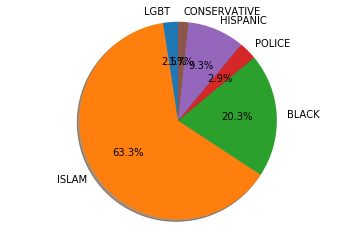

In [22]:
#plot as pie the distribution of ads on topics 

labels = 'LGBT','ISLAM','BLACK','POLICE','HISPANIC','CONSERVATIVE'
sizes = [len(df[df['LGBT']==1]),
         len(df[df['BLACK']==1]),
         len(df[df['POLICE']==1]),
         len(df[df['ISLAM']==1]),
         len(df[df['HISPANIC']==1]),
         len(df[df['CONSERVATIVE']==1]),]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [23]:
len(df)

2644

In [99]:
a=len(df[df['AD_IMPRESSIONS']==0])
b=len(df[(df['AD_IMPRESSIONS']<= 10) & (df['AD_IMPRESSIONS']>0)] )
c = len(df[(df['AD_IMPRESSIONS']<= 100) & (df['AD_IMPRESSIONS']> 10)])
d= len(df[(df['AD_IMPRESSIONS']<= 1000) & (df['AD_IMPRESSIONS']> 100)])
e= len(df[(df['AD_IMPRESSIONS']<= 10000) & (df['AD_IMPRESSIONS']> 1000)])
f= len(df[(df['AD_IMPRESSIONS']<= 100000) & (df['AD_IMPRESSIONS']> 10000)])
g= len(df[(df['AD_IMPRESSIONS']> 100000)])

In [111]:
y=[a,b,c,d,e,f,g]
x=[0,10,100,1000,10000,100000,'>100000']
#myInt = len(df)
#y= [x / myInt for x in y]

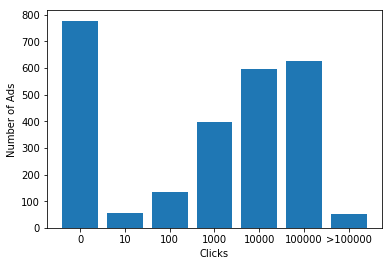

Text(0,0.5,'Number of Ads')

In [112]:
plt.bar(x,y)
plt.show()
plt.xlabel('impressions')
plt.ylabel('Number of Ads')

In [113]:
a=len(df[df['AD_CLICKS']==0])
b=len(df[(df['AD_CLICKS']== 1)])
c= len(df[(df['AD_CLICKS']<= 10) & (df['AD_CLICKS']> 1)])
d= len(df[(df['AD_CLICKS']<= 100) & (df['AD_CLICKS']> 10)])
e= len(df[(df['AD_CLICKS']<= 1000) & (df['AD_CLICKS']> 100)])
f= len(df[(df['AD_CLICKS']<= 10000) & (df['AD_CLICKS']> 1000)])
g= len(df[(df['AD_CLICKS']> 10000)])

In [114]:
y=[a,b,c,d,e,f,g]
x=[0,1,10,100,1000,10000,'>10000']
#myInt = len(df)
#y= [x / myInt for x in y]

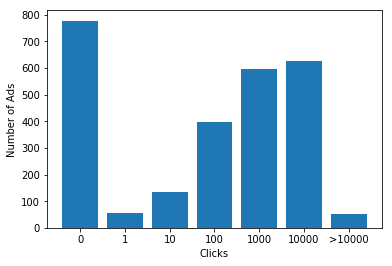

Text(0,0.5,'Number of Ads')

In [116]:
plt.bar(x,y)
plt.show()
plt.xlabel('Clicks')
plt.ylabel('Number of Ads')